<a href="https://colab.research.google.com/github/rkp74/Smart_Transportation_System/blob/main/Road_Traffic_Fatality.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import sklearn
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn_pandas
from io import StringIO
%matplotlib inline 

In [ ]:
def save_figure(plt, x_axis, y_axis, chart_title, file_name, legend=None):

    plt.xlabel(x_axis)
    plt.ylabel(y_axis)
    plt.title(chart_title)
    
    if legend:
        plt.legend([legend])

    # save the figure
    plt.savefig(file_name, dpi=300, bbox_inches='tight')

In [ ]:
# Import the data
data_1 = pd.read_csv('2017.csv', sep=",")
data_2 = pd.read_csv('2017.csv', sep=",")
data_3 = pd.read_csv('2018.csv', sep=",")
data_4 = pd.read_csv('2019.csv', sep=",")


In [ ]:
cols = [0]
data_1.drop(data_1.columns[cols],axis=1,inplace=True)
data_2.drop(data_2.columns[cols],axis=1,inplace=True)


In [ ]:
heading_1 = data_1.columns
heading_2 = data_2.columns
heading_3 = data_3.columns
heading_4 = data_4.columns

In [ ]:
common_headings = list(set(heading_1) & set(heading_2) & set(heading_3) & set(heading_4))

In [ ]:
df = pd.DataFrame(columns = common_headings)
df = df.merge(data_1, how='right')

df = pd.concat([df, data_2, data_3, data_4])
df = df.drop(columns=['Accident Fields_Reference Number',
                     'Casualty Fields_Reference Number', 
                     'Casualty Veh No', 
                     'Vehicle Fields_Reference Number', 
                     'Local Authority',
                     '1st Road Class',
                     '1st Road Class & No',
                     'Reference Number',
                     'Vehicle Number'
                ])

df = df.dropna()
df.isnull().sum()

Grid Ref: Easting      0
Grid Ref: Northing     0
Number of Vehicles     0
Accident Date          0
Time (24hr)            0
Road Surface           0
Lighting Conditions    0
Weather Conditions     0
Type of Vehicle        0
Casualty Class         0
Casualty Severity      0
Sex of Casualty        0
Age of Casualty        0
dtype: int64

In [ ]:
# Labels
road_surface = {
    'Dry': 1, 
    'Wet/Damp': 2, 
    'Snow': 3,
    'Frost/Ice': 4,
    'Flood (surface water over 3cm deep)': 5
}


lighting_conditions = {
    'Daylight: Street lights present':1,
    'Daylight: No street lighting':2,
    'Daylight: Street lighting unknown':3,
    'Darkness: Street lights present and lit':4,
    'Darkness: Street lights present but unlit':5,
    'Darkness: No street lighting':6,
    'Darkness: Street lighting unknown':7
    }


weather_conditions = {
    'Fine without high winds':1,
    'Raining without high winds':2,
    'Snowing without high winds':3,
    'Fine with high winds':4,
    'Raining with high winds':5,
    'Snowing with high winds':6,
    'Fog or mist (if hazard)':7,
    'Other':8,
    'Unknown':9
}


type_of_vehicle = {
    'Pedal cycle':1,
    'M/cycle 50cc and under':2,
    'Motorcycle over 50cc and up to 125cc':3,
    'Motorcycle over 125cc and up to 500cc':4,
    'Motorcycle over 500cc':5,
    '[Not used]':6,
    '[Not used]':7,
    'Taxi/Private hire car':8,
    'Car':9,
    'Minibus (8 ñ 16 passenger seats)':10,
    'Bus or coach (17 or more passenger seats)':11,
    '[Not used]':12,
    '[Not used]':13,
    'Other motor vehicle':14,
    'Other non-motor vehicle':15,
    'Ridden horse':16,
    'Agricultural vehicle (includes diggers etc.)':17,
    'Tram / Light rail':18,
    'Goods vehicle 3.5 tonnes mgw and under':19,
    'Goods vehicle over 3.5 tonnes and under 7.5 tonnes mgw':20,
    'Goods vehicle 7.5 tonnes mgw and over':21,
    'Mobility Scooter':22,
    'Other Vehicle ':90,
    'Motorcycle - Unknown CC':97
}

casualty_class = {
    'Driver or rider':1,
    'Vehicle or pillion passenger':2,
    'Pedestrian':3
}

casualty_severity = {
    'Fatal':1,
    'Serious':2,
    'Slight':3
}

sex_of_casuality = {
    'Male':1,
    'Female':2
}

In [ ]:
type_of_vehicle

{'Pedal cycle': 1,
 'M/cycle 50cc and under': 2,
 'Motorcycle over 50cc and up to 125cc': 3,
 'Motorcycle over 125cc and up to 500cc': 4,
 'Motorcycle over 500cc': 5,
 '[Not used]': 13,
 'Taxi/Private hire car': 8,
 'Car': 9,
 'Minibus (8 ñ 16 passenger seats)': 10,
 'Bus or coach (17 or more passenger seats)': 11,
 'Other motor vehicle': 14,
 'Other non-motor vehicle': 15,
 'Ridden horse': 16,
 'Agricultural vehicle (includes diggers etc.)': 17,
 'Tram / Light rail': 18,
 'Goods vehicle 3.5 tonnes mgw and under': 19,
 'Goods vehicle over 3.5 tonnes and under 7.5 tonnes mgw': 20,
 'Goods vehicle 7.5 tonnes mgw and over': 21,
 'Mobility Scooter': 22,
 'Other Vehicle ': 90,
 'Motorcycle - Unknown CC': 97}

In [ ]:
df = df.replace({"Road Surface": road_surface})
df = df.replace({"Lighting Conditions": lighting_conditions})
df = df.replace({"Weather Conditions": weather_conditions})
df = df.replace({"Type of Vehicle": type_of_vehicle})
df = df.replace({"Casualty Class": casualty_class})
df = df.replace({"Casualty Severity": casualty_severity})
df = df.replace({"Sex of Casualty": sex_of_casuality})

In [ ]:
df["Road Surface"].unique()
# df["Lighting Conditions"].unique()
# df["Weather Conditions"].unique()
# df["Type of Vehicle"].unique()
# df["Type of Vehicle"].unique()
# df["Casualty Class"].unique()
# df["Casualty Severity"].unique()

array([1, 2, 4, 3, 5, 9])

In [ ]:
df

,Grid Ref: Easting,Grid Ref: Northing,Number of Vehicles,Accident Date,Time (24hr),Road Surface,Lighting Conditions,Weather Conditions,Type of Vehicle,Casualty Class,Casualty Severity,Sex of Casualty,Age of Casualty
0,426340,428455,1,3/17/2017,815,1,1,8,9,3,2,2,61
1,430828,433222,2,1/14/2017,1330,1,1,1,1,1,3,1,36
2,428940,429856,2,1/1/2017,805,2,1,1,9,1,3,1,32
3,428940,429856,2,1/1/2017,805,2,1,1,9,1,3,1,30
4,429899,434277,2,1/1/2017,1705,2,4,2,9,2,3,2,26
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1902,442094,434619,1,30/12/2019,422,2,4,4,9,1,3,1,27
1903,423019,437653,1,30/12/2019,1000,4,1,1,5,1,2,1,36
1904,436853,442515,2,31/12/2019,1340,1,1,1,1,1,2,1,59
1905,421466,433999,3,31/12/2019,1640,1,4,1,9,1,3,1,41


In [ ]:
# Save the encoded data frame
df.to_csv('full_dataset_encoded.csv')

In [ ]:
df_input = pd.read_csv('full_dataset_encoded.csv')
df_input

,Unnamed: 0,Grid Ref: Easting,Grid Ref: Northing,Number of Vehicles,Accident Date,Time (24hr),Road Surface,Lighting Conditions,Weather Conditions,Type of Vehicle,Casualty Class,Casualty Severity,Sex of Casualty,Age of Casualty
0,0,426340,428455,1,3/17/2017,815,1,1,8,9,3,2,2,61
1,1,430828,433222,2,1/14/2017,1330,1,1,1,1,1,3,1,36
2,2,428940,429856,2,1/1/2017,805,2,1,1,9,1,3,1,32
3,3,428940,429856,2,1/1/2017,805,2,1,1,9,1,3,1,30
4,4,429899,434277,2,1/1/2017,1705,2,4,2,9,2,3,2,26
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8303,1902,442094,434619,1,30/12/2019,422,2,4,4,9,1,3,1,27
8304,1903,423019,437653,1,30/12/2019,1000,4,1,1,5,1,2,1,36
8305,1904,436853,442515,2,31/12/2019,1340,1,1,1,1,1,2,1,59
8306,1905,421466,433999,3,31/12/2019,1640,1,4,1,9,1,3,1,41


In [ ]:
df_input = df_input[df_input['Lighting Conditions'].apply(lambda x: str(x).isnumeric())]
df_input = df_input[df_input['Type of Vehicle'].apply(lambda x: str(x).isnumeric())]

le = preprocessing.LabelEncoder()
df_input['Casualty Severity'] = le.fit_transform(df_input['Casualty Severity'])
Y = df_input['Casualty Severity']
df_input = df_input.drop(columns=['Casualty Severity', 'Accident Date', 'Unnamed: 0'])

In [ ]:
from sklearn_pandas import DataFrameMapper

mapper = DataFrameMapper([(df_input.columns, StandardScaler())])
scaled_features = mapper.fit_transform(df_input.copy(), 4)
scaled_features_df = pd.DataFrame(scaled_features, index=df_input.index, columns=df_input.columns)
scaled_features_df

,Grid Ref: Easting,Grid Ref: Northing,Number of Vehicles,Time (24hr),Road Surface,Lighting Conditions,Weather Conditions,Type of Vehicle,Casualty Class,Sex of Casualty,Age of Casualty
0,-0.702549,-1.227996,-1.265424,-1.155736,-0.524604,-0.712075,8.086051,0.228293,1.956473,1.163411,1.351225
1,0.167358,-0.188534,0.048924,-0.151254,-0.524604,-0.712075,-0.271862,-1.494365,-0.732612,-0.859541,0.004168
2,-0.198592,-0.922503,0.048924,-1.175241,1.264860,-0.712075,-0.271862,0.228293,-0.732612,-0.859541,-0.211361
3,-0.198592,-0.922503,0.048924,-1.175241,1.264860,-0.712075,-0.271862,0.228293,-0.732612,-0.859541,-0.319126
4,-0.012709,0.041512,0.048924,0.580164,1.264860,0.717232,0.922125,0.228293,0.611930,1.163411,-0.534655
...,...,...,...,...,...,...,...,...,...,...,...
8303,2.351041,0.116087,-1.265424,-1.922263,1.264860,0.717232,3.310100,0.228293,-0.732612,-0.859541,-0.480773
8304,-1.346256,0.777662,-1.265424,-0.794903,4.843789,-0.712075,-0.271862,-0.633036,-0.732612,-0.859541,0.004168
8305,1.335181,1.837839,0.048924,-0.131750,-0.524604,-0.712075,-0.271862,-1.494365,-0.732612,-0.859541,1.243460
8306,-1.647274,-0.019107,1.363271,0.453385,-0.524604,0.717232,-0.271862,0.228293,-0.732612,-0.859541,0.273579


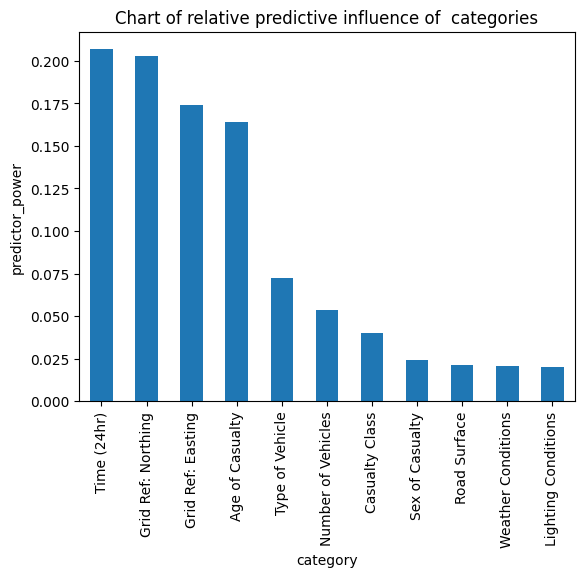

In [ ]:
from sklearn.datasets import make_regression
from sklearn.tree import DecisionTreeRegressor

# define the model
model = DecisionTreeRegressor()
# fit the model
model.fit(df_input, Y)
# get importance
importance = model.feature_importances_

#plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=df_input.columns)
feat_importances.nlargest(14).plot(kind='bar')


save_figure(plt, 'category', 'predictor_power', 'Chart of relative predictive influence of  categories', 'save_test.png')
plt.show()

In [ ]:
data_input_reduced = df_input[[
    'Time (24hr)', \
    'Grid Ref: Northing', \
    'Grid Ref: Easting',  \
    'Age of Casualty', \
    'Type of Vehicle',  \
]]

Y_df = pd.DataFrame(Y)
input_output = pd.concat([data_input_reduced, Y_df], axis=1, ) 
input_output
Y_df

,Casualty Severity
0,1
1,2
2,2
3,2
4,2
...,...
8303,2
8304,1
8305,1
8306,2


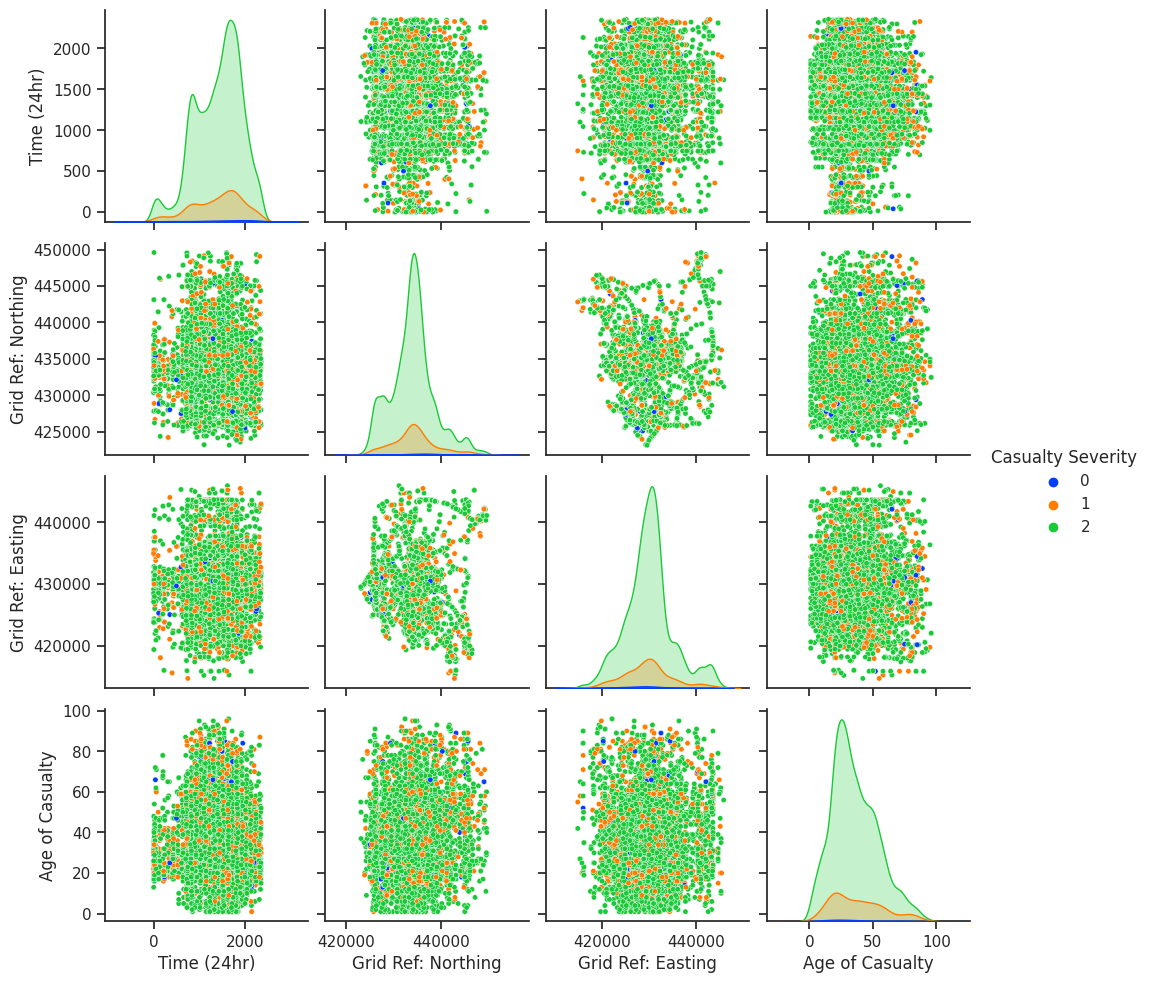

In [ ]:
sns.set_theme(style="ticks")

# sns.pairplot(input_output, hue='Casualty Severity', palette='mako')
plot_kws={"s": 3}
sns_plot = sns.pairplot(input_output, hue='Casualty Severity', palette='bright', dropna=False, plot_kws={"color":"darkred","s":15})

In [ ]:
sns_plot.savefig("output.png")

In [ ]:
from sklearn.model_selection import train_test_split

# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(data_input_reduced,Y, test_size=0.2) # 70% training and 30% test

In [ ]:
data_input_reduced

,Time (24hr),Grid Ref: Northing,Grid Ref: Easting,Age of Casualty,Type of Vehicle
0,815,428455,426340,61,9
1,1330,433222,430828,36,1
2,805,429856,428940,32,9
3,805,429856,428940,30,9
4,1705,434277,429899,26,9
...,...,...,...,...,...
8303,422,434619,442094,27,9
8304,1000,437653,423019,36,5
8305,1340,442515,436853,59,1
8306,1640,433999,421466,41,9


In [ ]:
#Import knearest neighbors Classifier model
from sklearn.neighbors import KNeighborsClassifier

#Create KNN Classifier
knn = KNeighborsClassifier(n_neighbors=3)

#Train the model using the training sets
knn.fit(X_train, y_train)

#Predict the response for test dataset
y_pred = knn.predict(X_test)

In [ ]:
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics
# Model Accuracy, how often is the classifier correct?
print("Accuracy: {:2.3f}".format(metrics.accuracy_score(y_test, y_pred)))

Accuracy: 0.799


In [ ]:
(knn.predict(data_input_reduced) == Y).sum()

6695

In [ ]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.07      0.07      0.07        15
           1       0.26      0.17      0.20       213
           2       0.86      0.91      0.89      1288

    accuracy                           0.80      1516
   macro avg       0.40      0.38      0.39      1516
weighted avg       0.77      0.80      0.78      1516



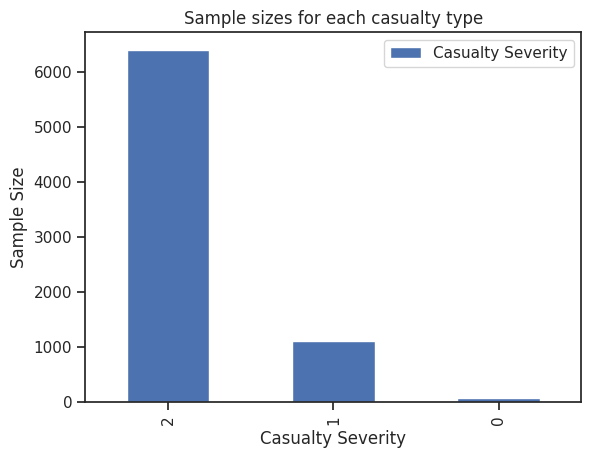

In [ ]:
plot_ = pd.DataFrame(Y.value_counts())
plt = plot_.plot.bar(title='Sample sizes for each casualty type', xlabel='Casualty Severity', ylabel='Sample Size')
# plt.xlabel('Casualty Severity')
# plt.ylabel('Sampel Count')
# plt.title('Sample sizes for each casualty type')